## EMPLOYEE ATTRITION PREDICTION

Here the dataset contains 15000 records with 10 different features. The main theme of this project is to predict the employees who are about to leave the office are the company. Lets's hope at last I come up with the most reliable model that is ideal for this prediction.This helps to increase the management power and the HR team to introduce new techniques to decrease the attrition rate.

The first step in this project goes in importing the required packages and modules.

In [87]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report , confusion_matrix,accuracy_score 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as  plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import binarize
from sklearn.ensemble import  RandomForestClassifier
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn import tree
from sklearn.model_selection import GridSearchCV

In [122]:
data = pd.read_csv('D:\study\learn\Eswar\project_EAP\EAP_EXP_DATASET.csv')


In [89]:
data["satisfaction_level"] = data["satisfaction_level"].replace(np.NaN, data["satisfaction_level"].median())

In [90]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_of_projects     14999 non-null  int64  
 3   average_monthly_hours  14999 non-null  int64  
 4   years_at_company       14999 non-null  int64  
 5   work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [91]:
data['department'].unique()

array(['sales', 'accounting', 'hr', 'technical', 'support', 'management',
       'IT', 'product_mng', 'marketing', 'RandD'], dtype=object)

Now,I mention the columns in the dataset and they are:
    
    1.satisfaction_level
    2.last_evaluation
    3.number_of_projects
    4.average_monthly_hours
    5.years_at_company
    6.work_accident
    7.left
    8.promotion_last_5years
    9.department
    10.salary

This dataset consists of 15000 rows and 10 columns.    

In [92]:
data_left_1=data[data['left']==1]

In [93]:
data_left_1.head()

,satisfaction_level,last_evaluation,number_of_projects,average_monthly_hours,years_at_company,work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


## Exploring Data Analysis

This section helps in exploring the data thoroughly.This includes like finding the correlation between the features and the target label,and additional information that is best required for a good prediction.This section helps in knowing how each feature is related to the target and this is done through visualization inorder to depict which feature broadly defines the target label.I used basic implementation which is easily understood by every one even who has a minimum knowlwdge regarding the subject.

In [95]:

data.describe()

,satisfaction_level,last_evaluation,number_of_projects,average_monthly_hours,years_at_company,work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


By observing the above information regarding the entire dataset,we can conclude that:
    
1.On an average,24% of the employees have left the firm which depicts a great loss of talent.

2.On looking at the last evaluation score,it is approximately 71% which is good score but even the left candidates precentage has a higher score which implies that the company is loosing a talented and knowledgeable employees.

In [96]:
data_left_1 = data[data['left']==1]
data_left_1.describe()

,satisfaction_level,last_evaluation,number_of_projects,average_monthly_hours,years_at_company,work_accident,left,promotion_last_5years
count,3571.000000,3571.000000,3571.000000,3571.000000,3571.000000,3571.000000,3571.0,3571.000000
mean,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,1.0,0.005321
std,0.263933,0.197673,1.818165,61.202825,0.977698,0.212364,0.0,0.072759
min,0.090000,0.450000,2.000000,126.000000,2.000000,0.000000,1.0,0.000000
25%,0.130000,0.520000,2.000000,146.000000,3.000000,0.000000,1.0,0.000000
50%,0.410000,0.790000,4.000000,224.000000,4.000000,0.000000,1.0,0.000000
75%,0.730000,0.900000,6.000000,262.000000,5.000000,0.000000,1.0,0.000000
max,0.920000,1.000000,7.000000,310.000000,6.000000,1.000000,1.0,1.000000


By observing the above data exploration of the left employees,we are now up with some more data diving deep into the project-

1.The employees who left the firm have a less satisfaction level.

2.The employees who are left exhibited only marginally better as compared to the other employees in the firm.

3.We can also find two other noticeable points-
   
   1.The both ratio of employees stayed the same duration of time in the firm.
   
   2.They were assigned the same number of projects as everyone else.

Now lets dive deeper into the dataset using visualization techniques.With these techniques we will be able to understand the behaviour of the dataset more broadly and clearly which hepls in better prediction.

In [97]:
def Histo(data,to_plot):
    for i in range(len(to_plot)):
        plt.hist(data[to_plot[i]])
        plt.axvline(data[to_plot[i]].mean(),color='r')
        plt.xlabel(to_plot[i])
        plt.show()

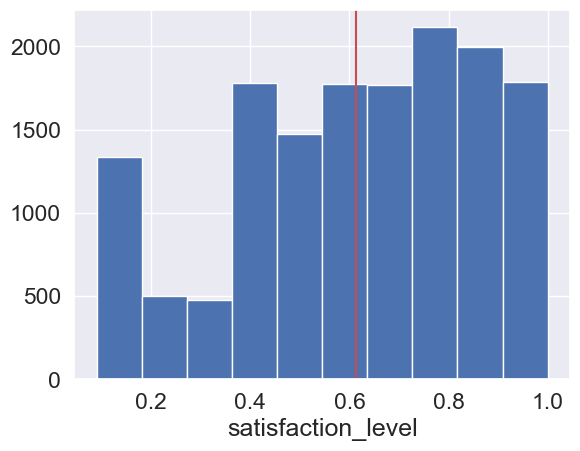

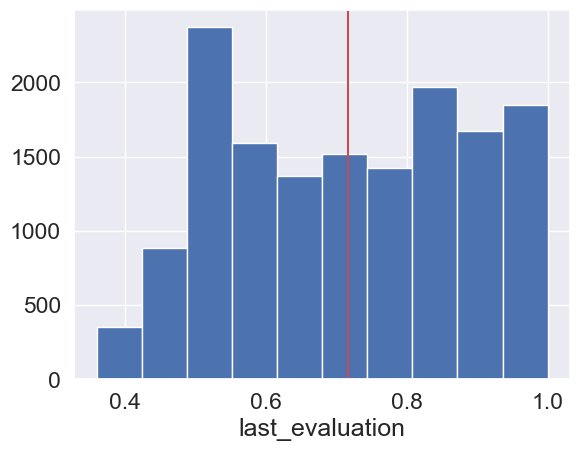

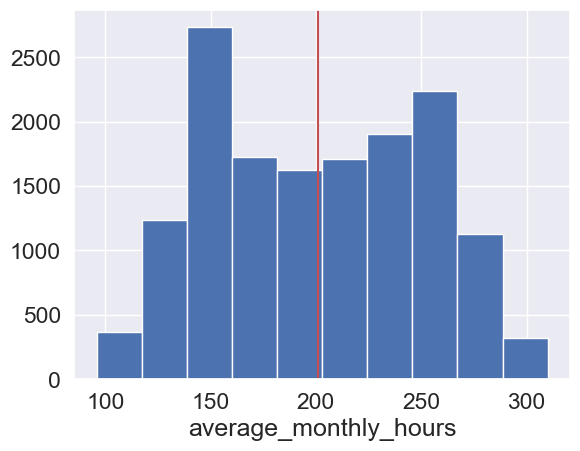

In [98]:
t_plt =['satisfaction_level','last_evaluation','average_monthly_hours']
Histo(data,t_plt)

Looking at the histograms above,we donot get much clear cut information regarding the features of the dataset.Now,lets move some what deeper to see:

1.To observe the last_evaluation score of the employees  who left and stayed in the firm.

2.To depict the department to which the left employee belongs to.

C:\Users\eswar\AppData\Local\Temp\ipykernel_40504\3506910728.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=data_left_1['department'], ax=axs[1], palette=palette, label='Department wise attrition')


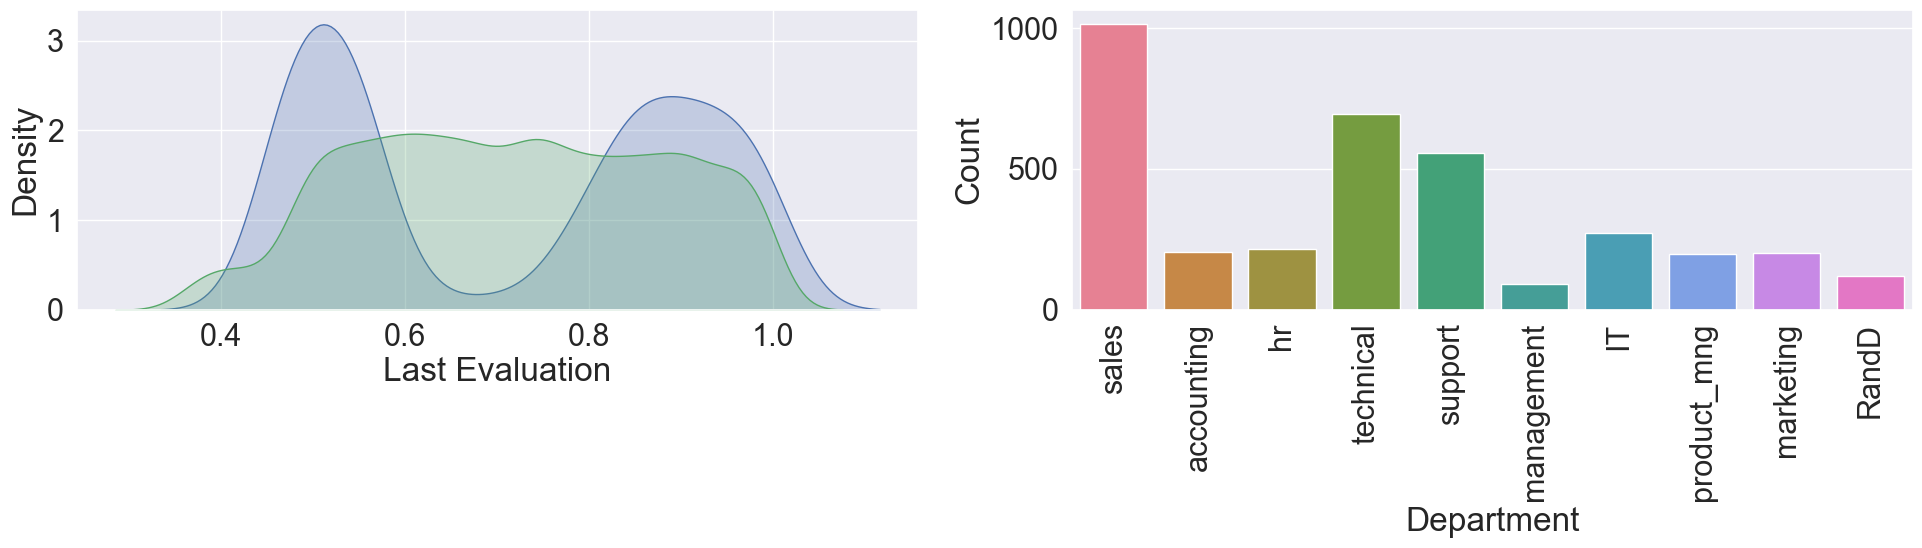

In [99]:
sns.set(font_scale=2)

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(20, 6))
sns.kdeplot(data=data_left_1['last_evaluation'], color='b', ax=axs[0], fill=True, label='Left')
axs[0].set_xlabel('Last Evaluation')
sns.kdeplot(data=data[data['left'] == 0]['last_evaluation'], color='g', ax=axs[0], fill=True, label='Stayed')
departments = data_left_1['department'].unique()
palette = sns.color_palette("husl", len(departments))
sns.countplot(x=data_left_1['department'], ax=axs[1], palette=palette, label='Department wise attrition')
axs[1].set_xlabel('Department')
axs[1].set_ylabel('Count')
axs[1].tick_params(axis='x', rotation=90)

plt.tight_layout()
plt.show()


In [107]:
target_mappers = {'sales':0,'accounting':1,'technical':3,'support':4,'management':5,'IT':6,'product_mng':7,'marketing':8,'RandD':9,'hr':2}
def target_encode(val):
    return target_mappers[val]

data['department'] = data['department'].apply(target_encode)
print(data['department'])

0        0
1        0
2        0
3        0
4        0
        ..
14994    4
14995    4
14996    4
14997    4
14998    4
Name: department, Length: 14999, dtype: int64


In [108]:
target_mappers = {'low':0,'medium':1,'high':2}
def target_encode(val):
    return target_mappers[val]

data['salary'] = data['salary'].apply(target_encode)
print(data['salary'])

0        0
1        1
2        1
3        0
4        0
        ..
14994    0
14995    0
14996    0
14997    0
14998    0
Name: salary, Length: 14999, dtype: int64


By careful observation from the above plot(1):

1.The employees who left the firm are almost the ones who show very poor performance in work or the ones who show a very great performance

2.The employees who belong to sales department left the firm the most.

Now,its time to check the behaviour of one feature with the other.For doing this,we implement a correlation matrix to depict how each feature is related with the other.

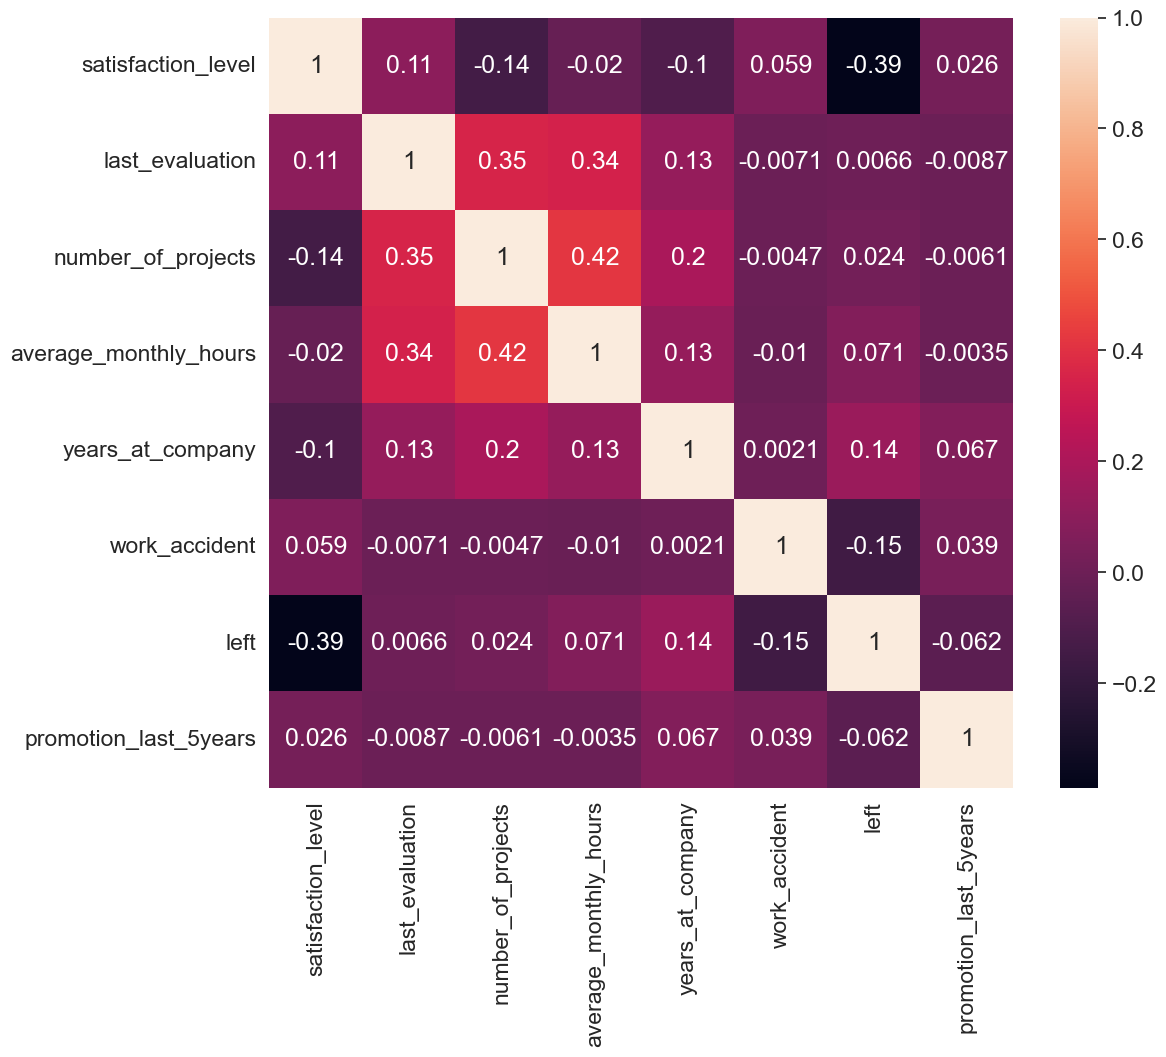

In [117]:
data1=data
columns_to_drop=['department','salary']
data1.drop(columns=columns_to_drop,inplace=True)
sns.set(font_scale=1.5)
plt.figure(figsize=(12,10))
sns.heatmap(data1.corr(),annot=True)
plt.xticks(rotation=90)
plt.show()

In [118]:
data.corr()

,satisfaction_level,last_evaluation,number_of_projects,average_monthly_hours,years_at_company,work_accident,left,promotion_last_5years
satisfaction_level,1.000000,0.105021,-0.142970,-0.020048,-0.100866,0.058697,-0.388375,0.025605
last_evaluation,0.105021,1.000000,0.349333,0.339742,0.131591,-0.007104,0.006567,-0.008684
number_of_projects,-0.142970,0.349333,1.000000,0.417211,0.196786,-0.004741,0.023787,-0.006064
average_monthly_hours,-0.020048,0.339742,0.417211,1.000000,0.127755,-0.010143,0.071287,-0.003544
years_at_company,-0.100866,0.131591,0.196786,0.127755,1.000000,0.002120,0.144822,0.067433
work_accident,0.058697,-0.007104,-0.004741,-0.010143,0.002120,1.000000,-0.154622,0.039245
left,-0.388375,0.006567,0.023787,0.071287,0.144822,-0.154622,1.000000,-0.061788
promotion_last_5years,0.025605,-0.008684,-0.006064,-0.003544,0.067433,0.039245,-0.061788,1.000000


The correlation matrix results in telling how each feature is related with the other.If the result approaches 1,it tells that the features that achieved one are highly correlated.If the result approaches 0,it tells that the features that achieved 0 are badly correlated

On a whole,by the keen observation at the correlation matrix.we come up with two outcomes-

1.The features 'satisfaction_level' and the 'left' are negatively correlated which implies that there a bad correlation between the two features.

2.Highest correlation is achieved by the features 'number_of_projects' and 'average_monthly_hours' i.e,0.42

3.The next higher correlation is achieved by the features 'number_of_projects' and 'last_evaluation' i.e,0.35

Now lets go deeper regarding the target label.This means we separately understand both the classes in our target label i.e.left=0 or left=1.This helps in proper evaluation of target label.

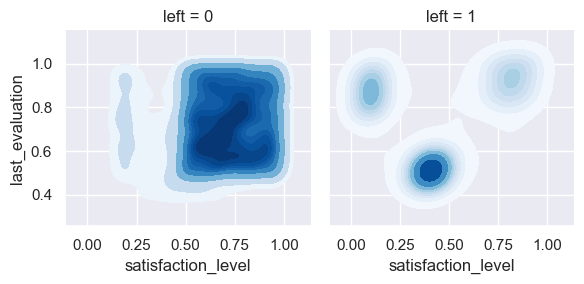

In [119]:
sns.set(color_codes=True)
plot = sns.FacetGrid(data,col='left',hue='left',sharex=True, sharey=True, height=3)
plot.map(sns.kdeplot,'satisfaction_level','last_evaluation',fill=True,cmap='Blues')
plt.show()

The above plot helps in clear visualization of the target label.Here Left=0 reveals about the employees who has not left the firm.Left=1 reveals about the employees who has left the firm.Here we can find two clusters in the first face grid and three clusters in the second face grid.

In the first face grid:larger cluster denotes the employess who has higher satisfaction_level and last_evaluation and stays in the firm.


In the second face grid,we deal with three types of issues:(deals with the employees who left the firm)

   1.employees with low satisfaction_level and low last_evaluation score.
   
   2.employees with low satisfaction_level and medium last_evaluation_score.
   
   3.employees with high satisfaction level and high last_evaluation score.
   
The firm experiences a heavier loss due lo lost of third type of employees in the second face grid.i.e the employees with higher satisfaction_level and last_evaluation.   

Now lets plot for this third tier of employees whose lose effects the company a lot.

C:\Users\eswar\AppData\Local\Temp\ipykernel_40504\3930192846.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(third_low['department'], palette=palette)


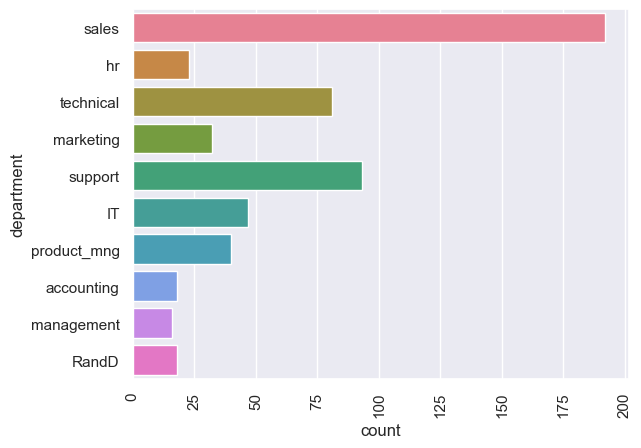

In [120]:
third=data_left_1[[all([a,b]) for a,b in zip(data_left_1['last_evaluation'] > data['last_evaluation'].mean(),data_left_1['satisfaction_level']>data['satisfaction_level'].mean())]]
third_low= third[third['salary']=='low']
departments = third_low['department'].unique()
palette = sns.color_palette("husl", len(departments))
sns.countplot(third_low['department'], palette=palette)
plt.xticks(rotation=90)
plt.show()

From the above graph,we conclude that the sales department experienced a higher level of attrition within the third tier of people in the second face grid.

## How well do each department satisfy its employees

Now we look into each department and verify how well do each leader satisfy its employees and maintain the knowledge pool at the same time.

In this we consider only few features that helps in gaining the above mentioned information.

1.satisfaction_level

2.last_evaluation

3.number_of_projects

4.average_monthly_hours

In [123]:
dept = data['department'].unique()
avgl =[]
avge =[]
avgp =[]
avgh =[]
for i in dept:
    mean = data['satisfaction_level'][data['department']==i].mean()
    avgl.append(mean)       
for i in dept:
    mean = data['last_evaluation'][data['department']==i].mean()
    avge.append(mean)       
for i in dept:
    meap = data['number_of_projects'][data['department']==i].mean()
    avgp.append(mean)
for i in dept:
    mean = data['average_monthly_hours'][data['department']==i].mean()
    avgh.append(mean)

In [124]:
avg=pd.DataFrame({'Dept': dept,'AVGL':avgl,'AVGE':avge,'AVGP':avgp,'AVGH':avgh},index=None)

In [125]:
avg

,Dept,AVGL,AVGE,AVGP,AVGH
0,sales,0.614447,0.709717,0.712122,200.911353
1,accounting,0.582151,0.717718,0.712122,201.162973
2,hr,0.598809,0.708850,0.712122,198.684709
3,technical,0.607897,0.721099,0.712122,202.497426
4,support,0.618300,0.723109,0.712122,200.758188
5,management,0.621349,0.724000,0.712122,201.249206
6,IT,0.618142,0.716830,0.712122,202.215974
7,product_mng,0.619634,0.714756,0.712122,199.965632
8,marketing,0.618601,0.715886,0.712122,199.385781
9,RandD,0.619822,0.712122,0.712122,200.800508


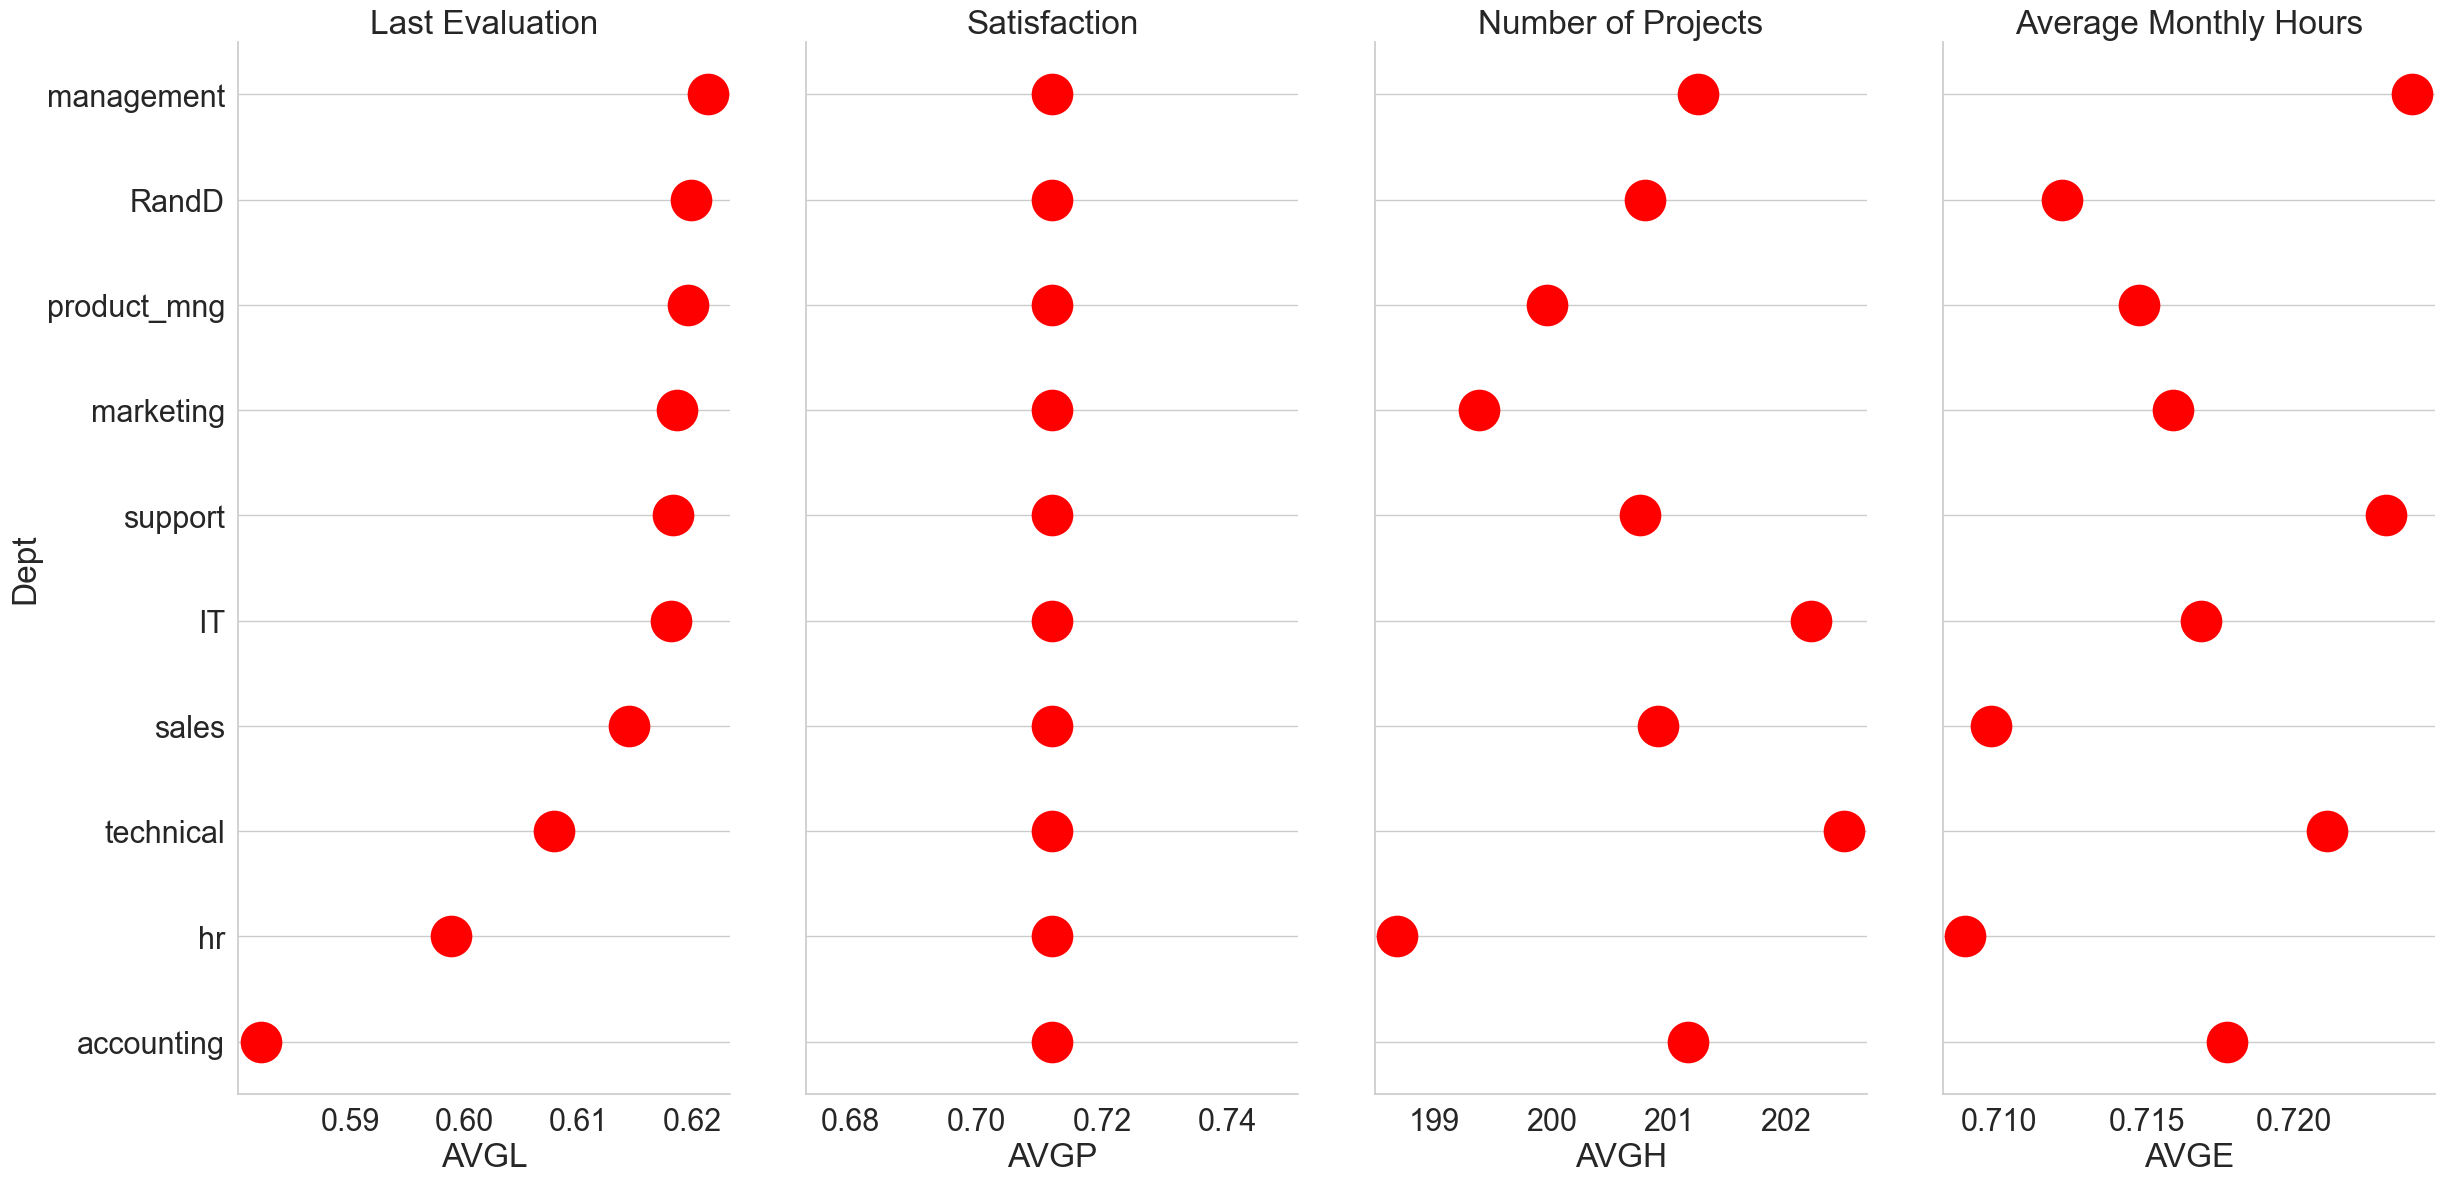

In [161]:
sns.set(style="whitegrid",font_scale=2)
p= sns.PairGrid(avg.sort_values('AVGL',ascending=False),y_vars='Dept',x_vars=['AVGL','AVGP','AVGH','AVGE'],height=12,aspect=0.5)
p.map(sns.stripplot,orient='h',palette="Reds_h", edgecolor='auto',size=30,color="red")
titles = ["Last Evaluation", "Satisfaction", "Number of Projects",'Average Monthly Hours']
plt.title('Department wise performance based on mentioned features')
for a,t in zip(p.axes.flat, titles):

    # Set a different title for each axes
    a.set(title=t)

    # Make the grid horizontal instead of vertical
    a.xaxis.grid(False)
    a.yaxis.grid(True)
plt.show()

From the above plot,we summarize that the management department succeeds in satisfying its employees.The management department achieved a score higher than the mean value in all the above mentined features.

Now we apply the same strategy in the case of left employees.

dsa = data[data['left']==1]
x_var=['satisfaction_level','last_evaluation','number_project']
dept = data['department'].unique()
lavgl =[]
lavge =[]
lavgp =[]
lavgh =[]
for i in dept:
    mean = dsa['satisfaction_level'][data_left_1['department']==i].mean()
    lavgl.append(mean)       
for i in dept:
    mean = dsa['last_evaluation'][data_left_1['department']==i].mean()
    lavge.append(mean)       
for i in dept:
    mean = dsa['number_of_projects'][data_left_1['department']==i].mean()
    lavgp.append(mean)       
for i in dept:
    mean = dsa['average_monthly_hours'][data_left_1['department']==i].mean()
    lavgh.append(mean)

In [130]:
Lavg=pd.DataFrame({'Dept': dept,'AVGL':avgl,'AVGE':avge,'AVGP':avgp,'AVGH':avgh},index=None)


In [131]:
Lavg

,Dept,AVGL,AVGE,AVGP,AVGH
0,sales,0.614447,0.709717,0.712122,200.911353
1,accounting,0.582151,0.717718,0.712122,201.162973
2,hr,0.598809,0.708850,0.712122,198.684709
3,technical,0.607897,0.721099,0.712122,202.497426
4,support,0.618300,0.723109,0.712122,200.758188
5,management,0.621349,0.724000,0.712122,201.249206
6,IT,0.618142,0.716830,0.712122,202.215974
7,product_mng,0.619634,0.714756,0.712122,199.965632
8,marketing,0.618601,0.715886,0.712122,199.385781
9,RandD,0.619822,0.712122,0.712122,200.800508


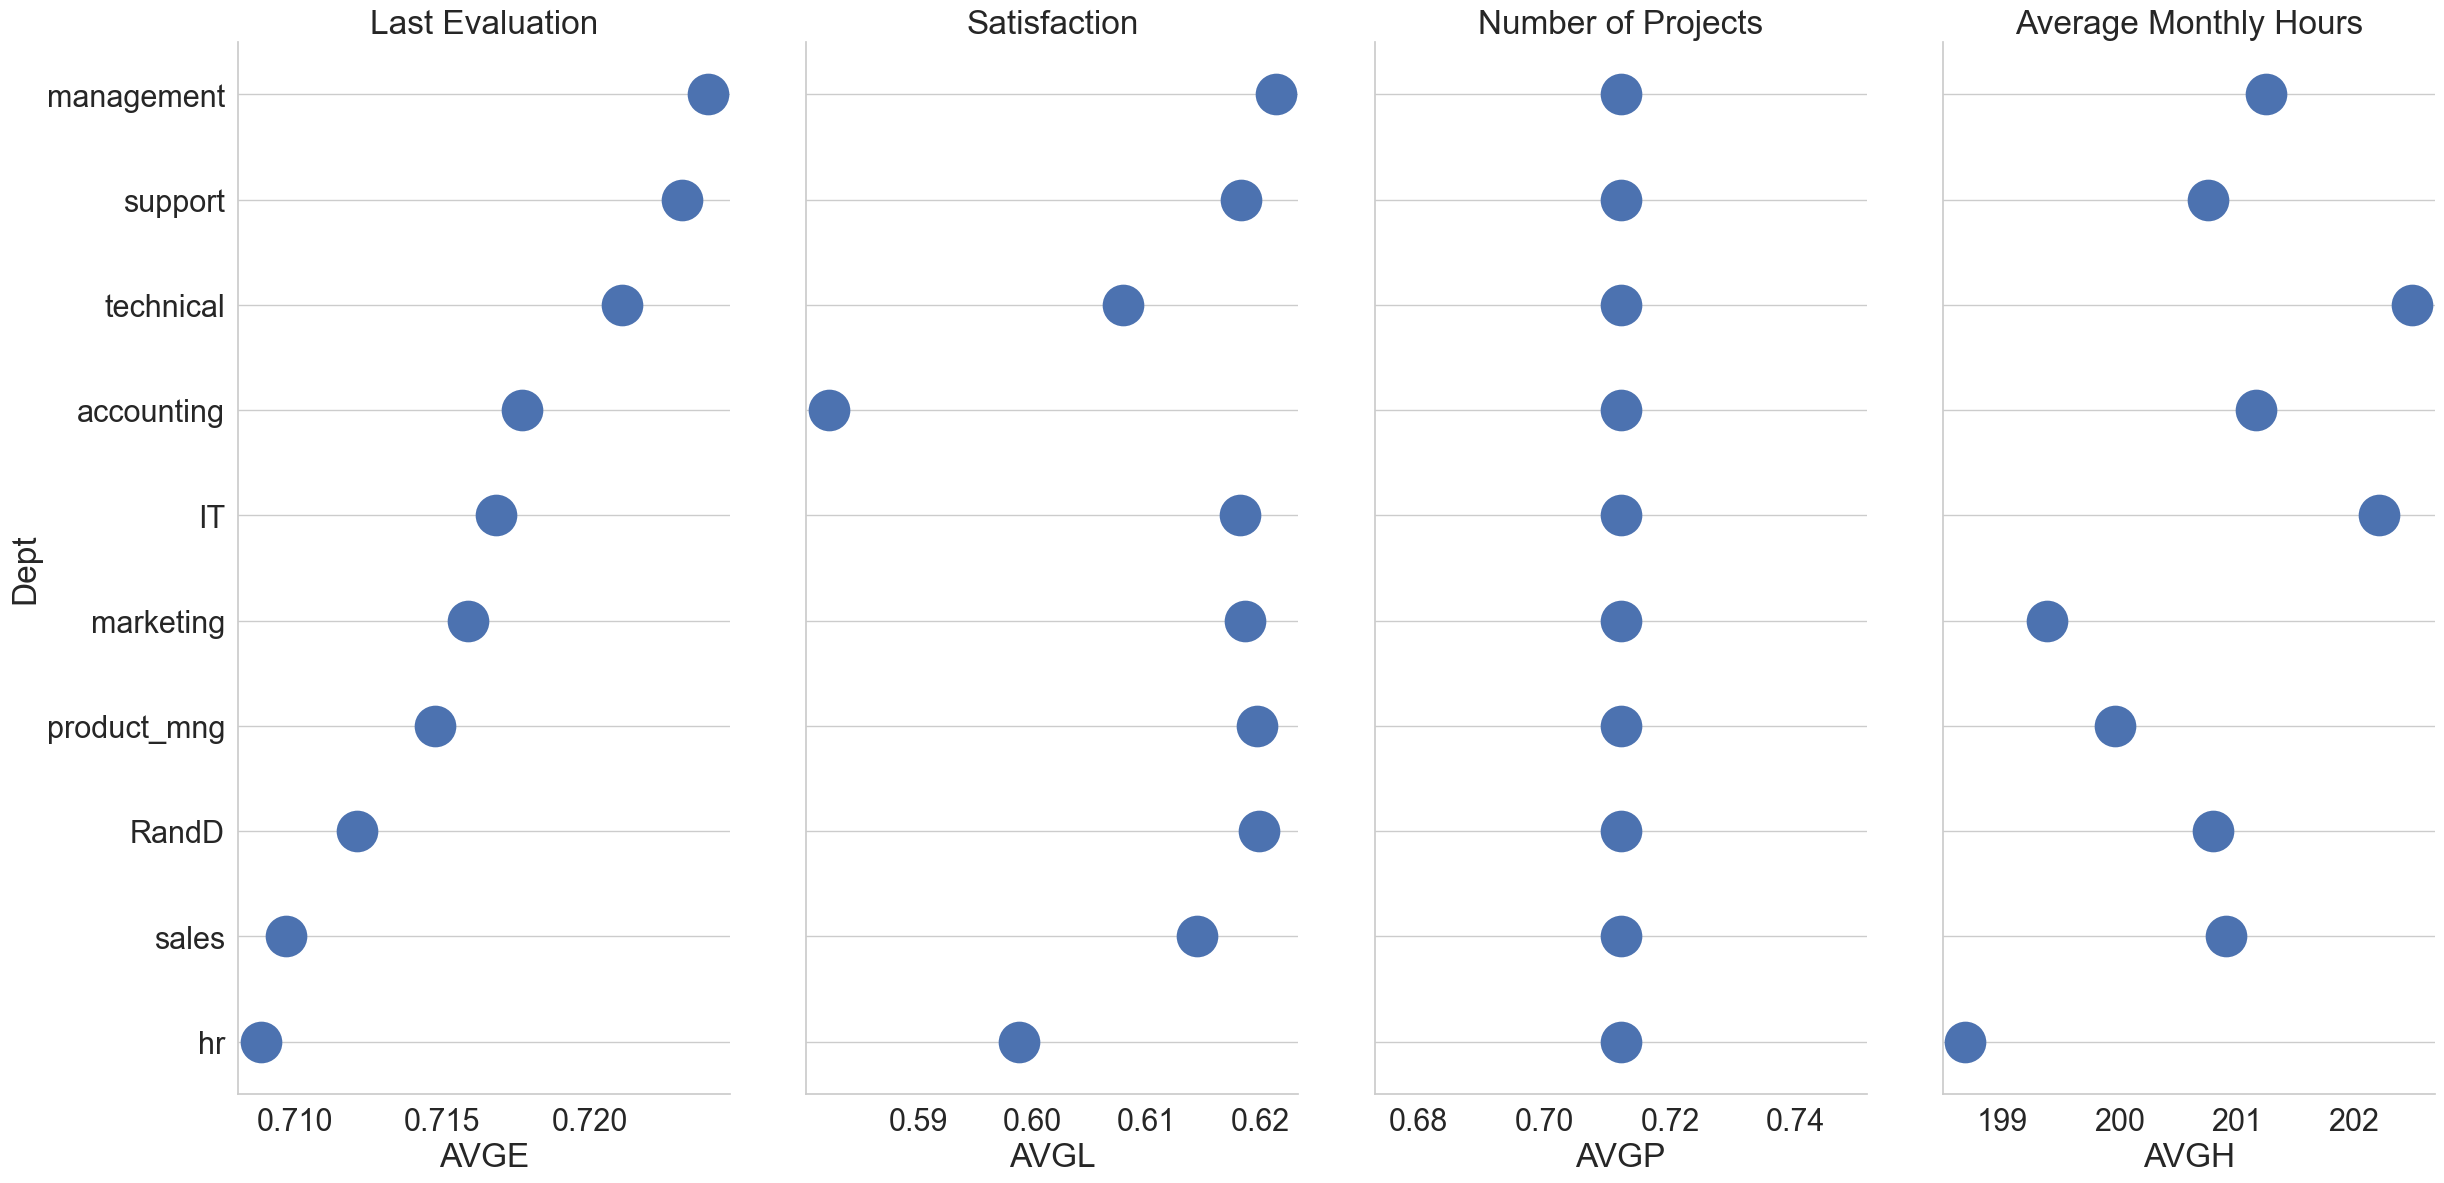

In [132]:
sns.set(style="whitegrid",font_scale=2)
lp= sns.PairGrid(Lavg.sort_values('AVGE',ascending=False),y_vars='Dept',x_vars=['AVGE','AVGL','AVGP','AVGH'],height=12,aspect=0.5)
lp.map(sns.stripplot,orient='h',palette="Reds_r", edgecolor="black",size=30)
titles = ["Last Evaluation", "Satisfaction", "Number of Projects",'Average Monthly Hours']
plt.title('Department wise performance based on our chosen features')
for a, t in zip(lp.axes.flat, titles):

#     Set a different title for each axes
    a.set(title=t)

    # Make the grid horizontal instead of vertical
    a.xaxis.grid(False)
    a.yaxis.grid(True)
plt.show()

Now,the above plot depicts that the department RanD has the highest attrition rate of employees who exhibited higher performance 

## Implementation

Lets dive into the most interesting portion of the project that is to predict the employees who has left the firm with the help of supervised machine learning algorithms.

## Pre-processing the data

Here we clean the data and make it ready for the model to fit and predict.

In [133]:
features = data.drop(['left'],axis=1)
target= data['left']
lb = LabelEncoder()
features['salary']= lb.fit_transform(features['salary'])
features['department']= lb.fit_transform(features['department'])


In [135]:
features

,satisfaction_level,last_evaluation,number_of_projects,average_monthly_hours,years_at_company,work_accident,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,0,7,1
1,0.80,0.86,5,262,6,0,0,7,2
2,0.11,0.88,7,272,4,0,0,7,2
3,0.72,0.87,5,223,5,0,0,7,1
4,0.37,0.52,2,159,3,0,0,7,1
...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,0,8,1
14995,0.37,0.48,2,160,3,0,0,8,1
14996,0.37,0.53,2,143,3,0,0,8,1
14997,0.11,0.96,6,280,4,0,0,8,1


In [136]:
features.head()

,satisfaction_level,last_evaluation,number_of_projects,average_monthly_hours,years_at_company,work_accident,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,0,7,1
1,0.80,0.86,5,262,6,0,0,7,2
2,0.11,0.88,7,272,4,0,0,7,2
3,0.72,0.87,5,223,5,0,0,7,1
4,0.37,0.52,2,159,3,0,0,7,1


Now we implement the train_test_split to split the data into testing sets and training sets.

In [137]:
X_train, X_test,y_train,y_test = train_test_split(features,target,test_size=0.4,random_state=2,stratify=target)
# scaling process to improve results
Xscale_train = pd.DataFrame(preprocessing.scale(X_train.values))
Xscale_test  =  pd.DataFrame(preprocessing.scale(X_test.values))

In [138]:
X_train.head()

,satisfaction_level,last_evaluation,number_of_projects,average_monthly_hours,years_at_company,work_accident,promotion_last_5years,department,salary
14526,0.73,0.86,4,245,6,0,0,7,1
10131,0.12,0.65,5,262,6,0,0,8,2
14210,0.50,0.73,4,180,3,0,0,0,1
12727,0.43,0.57,2,160,3,0,0,9,2
6117,0.90,0.60,3,268,3,0,0,7,1


In [139]:
Xscale_train.head()

,0,1,2,3,4,5,6,7,8
0,0.469777,0.837925,0.165398,0.897432,1.725524,-0.412579,-0.148435,0.395239,-0.549699
1,-1.987217,-0.388408,0.981418,1.239874,1.725524,-0.412579,-0.148435,0.744146,1.046024
2,-0.456631,0.078767,0.165398,-0.411902,-0.336352,-0.412579,-0.148435,-2.047108,-0.549699
3,-0.738581,-0.855582,-1.466640,-0.814774,-0.336352,-0.412579,-0.148435,1.093052,1.046024
4,1.154513,-0.680392,-0.650621,1.360735,-0.336352,-0.412579,-0.148435,0.395239,-0.549699


## Model Testing and Training

Now,we start with designing our models and fitting the test dataset to the model and predicting a good accuracy.

In [140]:
def parameters_tuning(model,X_train,y_train,X_test,y_test,metrics,param_grid,clf=False,conf=False):
    """Tune parameters of the model using a grid search, this function just makes the job easier."""
    gcv=GridSearchCV(model,param_grid=param_grid,scoring=metrics,cv=10)
    gcv.fit(X_train,y_train)
    prediction = gcv.predict(X_test)
    prob = gcv.predict_proba(X_test)[:,1]
    if clf == True:
        print (classification_report(y_test,prediction))
    if conf == True:
        print (confusion_matrix(y_test,prediction))
    print (gcv.best_params_)
    print (roc_auc_score(y_test,prob),'Optimised Score')

Now,I implement the Logistic Regression algorithm to predict the accuracy.

In [141]:
# Instantiate the Logistic Regression model
model = LogisticRegression(max_iter=1000, solver='liblinear')

# Fit the model on the training data
model.fit(X_train,y_train)

# Make predictions on the test data
predictions = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, predictions)
print(f'Accuracy: {accuracy:.2f}')


Accuracy: 0.77


After the implementation i.e.after the parameters tuning we observe a great hike in the prediction rate.

In [142]:
t= tree.DecisionTreeClassifier(class_weight='balanced',random_state=2)
t.fit(X_train,y_train)
t_pred = t.predict(X_test)
print (roc_auc_score(y_test,t_pred))


0.9725852283170486


In [143]:
rfc= RandomForestClassifier() #Random Forest
rfc.fit(X_train,y_train)
rfc_pred=rfc.predict(X_test)
rfc_param = dict(n_estimators=np.arange(5,25,10))
print (roc_auc_score(y_test,rfc_pred),'Initial Score')
parameters_tuning(rfc,X_train,y_train,X_test,y_test,'roc_auc',rfc_param)

0.9797580449502636 Initial Score
{'n_estimators': 15}
0.9893319860752701 Optimised Score


In [144]:
X_train.head()

,satisfaction_level,last_evaluation,number_of_projects,average_monthly_hours,years_at_company,work_accident,promotion_last_5years,department,salary
14526,0.73,0.86,4,245,6,0,0,7,1
10131,0.12,0.65,5,262,6,0,0,8,2
14210,0.50,0.73,4,180,3,0,0,0,1
12727,0.43,0.57,2,160,3,0,0,9,2
6117,0.90,0.60,3,268,3,0,0,7,1


In [145]:
features.head(2)

,satisfaction_level,last_evaluation,number_of_projects,average_monthly_hours,years_at_company,work_accident,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,0,7,1
1,0.80,0.86,5,262,6,0,0,7,2


In [146]:
features['salary'].value_counts()

salary
1    7316
2    6446
0    1237
Name: count, dtype: int64

In [147]:
target.value_counts()

left
0    11428
1     3571
Name: count, dtype: int64

In [148]:
import pickle
pickle.dump(rfc, open('final_prediction.pkl', 'wb'))